In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from  psaw import PushshiftAPI
import datetime
import numpy as np
import pandas_datareader as web
from dateutil import relativedelta
from datetime import datetime as dt
from tabulate import tabulate

In [66]:
df = pd.read_csv('df_with_returns.csv')
df[['Mentions','Returns_0w','Returns_1w','Vol_0w','Vol_1w']].corr() 
#low correlation - not a strong linear relationship between number of mentions and returns
#slightly higher with volatility. 

,Mentions,Returns_0w,Returns_1w,Vol_0w,Vol_1w
Mentions,1.000000,0.111762,-0.077517,0.264625,0.118171
Returns_0w,0.111762,1.000000,-0.093145,0.716392,0.271243
Returns_1w,-0.077517,-0.093145,1.000000,-0.128030,0.499857
Vol_0w,0.264625,0.716392,-0.128030,1.000000,0.274922
Vol_1w,0.118171,0.271243,0.499857,0.274922,1.000000


In [67]:
df = df[['Ticker', 'Mentions',
       'Start_Time', 'End_Time', 'Returns_0w', 'Returns_1w', 'Vol_0w',
       'Vol_1w']]

In [68]:
df = df.sort_values(by=["Start_Time", 'Mentions'])

In [69]:
t = datetime.datetime(2020,11,30)
dates = [t]
for i in range(1,53):
    dates.append(t+relativedelta.relativedelta(weeks=i))

In [73]:
weekly_returns0w = [1, ]
weekly_returns1w = [1, 1]
SP500_returns = [1, ]
for date in dates[:-1]:
    return0w = []
    return1w = []
#     start_time = datetime.datetime.strptime(df['Start_Time'][i], '%Y-%m-%d')

    end_time = date + relativedelta.relativedelta(weeks=1)
    price_0w = web.get_data_yahoo('SPY',
                        start = date,
                        end = end_time)['Adj Close']
    SP500_returns.append((price_0w[-1]/price_0w[0]))
    for i in range(len(df['Start_Time'])):
        if dt.strptime(df['Start_Time'][i], "%Y-%m-%d").date() == date.date():
            return0w.append(df['Returns_0w'][i] + 1)
            return1w.append(df['Returns_1w'][i]+ 1)
    
    if len(return0w) == 0:
        weekly_returns0w.append(1)
    else:
        weekly_returns0w.append(sum(return0w)/len(return0w))
    
    if len(return1w) == 0:
        weekly_returns1w.append(1)
    else:       
        weekly_returns1w.append(sum(return1w)/len(return1w))     
            

In [74]:
weekly_returns0w_cumulative_return = np.cumprod(weekly_returns0w)
weekly_returns1w_cumulative_return = np.cumprod(weekly_returns1w[:-1])
SP500_returns_cumulative_return = np.cumprod(SP500_returns)

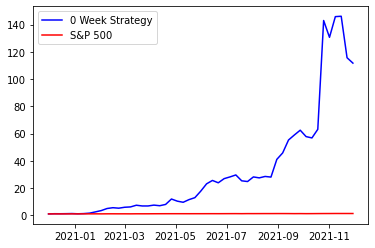

In [96]:
plt.plot(dates, weekly_returns0w_cumulative_return, label = '0 Week Strategy', color = 'blue')
# plt.plot(dates, weekly_returns1w_cumulative_return, label = '+1 Week Return')
plt.plot(dates, SP500_returns_cumulative_return, label = 'S&P 500', color = 'red')
plt.legend()
plt.show()

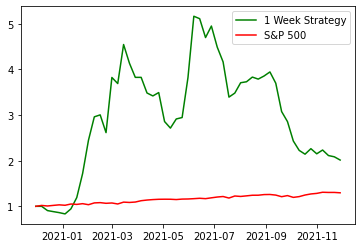

In [97]:
plt.plot(dates, weekly_returns1w_cumulative_return, label = '1 Week Strategy', color = 'green')
plt.plot(dates, SP500_returns_cumulative_return, label = 'S&P 500', color = 'red')
plt.legend()
plt.show()

In [76]:
df_cumreturns = pd.DataFrame({'Dates': dates,
                              'S&P500 Weekly Return': SP500_returns,
                              'S&P500 Cumulative Return' : SP500_returns_cumulative_return,
                              '+0 Weekly Return': weekly_returns0w,
                              '+0 Cumulative Return': weekly_returns0w_cumulative_return,
                              '+1 Weekly Return': weekly_returns1w[:-1],
                              '+1 Cumulative Return': weekly_returns1w_cumulative_return,
                             })

In [80]:
df_cumreturns.tail()

,Dates,S&P500 Weekly Return,S&P500 Cumulative Return,+0 Weekly Return,+0 Cumulative Return,+1 Weekly Return,+1 Cumulative Return
48,2021-11-01,1.009856,1.283543,0.913606,130.656638,0.950401,2.151489
49,2021-11-08,1.019324,1.308347,1.116304,145.852501,1.038520,2.234365
50,2021-11-15,0.996801,1.304162,1.001977,146.140896,0.945755,2.113162
51,2021-11-22,1.000300,1.304553,0.791506,115.671367,0.987018,2.085729
52,2021-11-29,0.993648,1.296266,0.965854,111.721616,0.965854,2.014509


In [81]:
df_cumreturns.to_csv('Final Cumulative Returns.csv')

In [101]:
table = [['Portfolio', 'Total Return', 'Volatility'],
    ['S&P 500', "{:.2%}".format(-1 + float(df_cumreturns['S&P500 Cumulative Return'].tail(1))), "{:.2%}".format(np.std(df_cumreturns['S&P500 Weekly Return']))],
    ['Week 0 Strategy', "{:.2%}".format(-1 + float(df_cumreturns['+0 Cumulative Return'].tail(1))), "{:.2%}".format(np.std(df_cumreturns['+0 Weekly Return']))],
    ['Week 1 Strategy', "{:.2%}".format(-1 + float(df_cumreturns['+1 Cumulative Return'].tail(1))), "{:.2%}".format(np.std(df_cumreturns['+1 Weekly Return']))],
        ]
print(tabulate(table, headers='firstrow'))

Portfolio        Total Return    Volatility
---------------  --------------  ------------
S&P 500          29.63%          1.59%
Week 0 Strategy  11072.16%       23.31%
Week 1 Strategy  101.45%         15.01%


In [100]:
df_cumreturns.tail()

,Dates,S&P500 Weekly Return,S&P500 Cumulative Return,+0 Weekly Return,+0 Cumulative Return,+1 Weekly Return,+1 Cumulative Return
48,2021-11-01,1.009856,1.283543,0.913606,130.656638,0.950401,2.151489
49,2021-11-08,1.019324,1.308347,1.116304,145.852501,1.038520,2.234365
50,2021-11-15,0.996801,1.304162,1.001977,146.140896,0.945755,2.113162
51,2021-11-22,1.000300,1.304553,0.791506,115.671367,0.987018,2.085729
52,2021-11-29,0.993648,1.296266,0.965854,111.721616,0.965854,2.014509


In [94]:
df_cumreturns.describe()

,S&P500 Weekly Return,S&P500 Cumulative Return,+0 Weekly Return,+0 Cumulative Return,+1 Weekly Return,+1 Cumulative Return
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1.005033,1.157250,1.112517,32.350158,1.023130,2.972044
std,0.016009,0.090151,0.235367,40.505841,0.151559,1.191138
min,0.968372,1.000000,0.791506,1.000000,0.814747,0.833375
25%,0.993648,1.074737,0.979145,5.886529,0.928547,2.151489
50%,1.006589,1.160799,1.066899,17.696772,0.988396,3.004977
75%,1.014114,1.229163,1.136463,41.040850,1.038520,3.824932
max,1.038484,1.308347,2.265821,146.140896,1.462261,5.167457
